In [1]:
import numpy as np
import pandas as pd

In [2]:
fake = pd.read_csv("data-sets/fake.csv")
fake["flag"] = 0
fake

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [3]:
true = pd.read_csv('data-sets/True.csv')
true['flag'] = 1
true

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [4]:
df = pd.DataFrame()
df = true.append(fake)

# 2. Data cleaning

**Data Type check**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   flag     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
flag       0
dtype: int64

removing duplicates

In [7]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [8]:
# correcting some date format

df['date'] = df['date'].replace(['19-Feb-18'],'February 19, 2018')
df['date'] = df['date'].replace(['18-Feb-18'],'February 18, 2018')
df['date'] = df['date'].replace(['17-Feb-18'],'February 17, 2018')
df['date'] = df['date'].replace(['16-Feb-18'],'February 16, 2018')
df['date'] = df['date'].replace(['15-Feb-18'],'February 15, 2018')
df['date'] = df['date'].replace(['14-Feb-18'],'February 14, 2018')
df['date'] = df['date'].replace(['13-Feb-18'],'February 13, 2018')


df['date'] = df['date'].str.replace('Dec ', 'December ')
df['date'] = df['date'].str.replace('Nov ', 'November ')
df['date'] = df['date'].str.replace('Oct ', 'October ')
df['date'] = df['date'].str.replace('Sep ', 'September ')
df['date'] = df['date'].str.replace('Aug ', 'August ')
df['date'] = df['date'].str.replace('Jul ', 'July ')
df['date'] = df['date'].str.replace('Jun ', 'June ')
df['date'] = df['date'].str.replace('Apr ', 'April ')
df['date'] = df['date'].str.replace('Mar ', 'March ')
df['date'] = df['date'].str.replace('Feb ', 'February ')
df['date'] = df['date'].str.replace('Jan ', 'January ')

In [9]:
df['date'] = df['date'].str.replace(' ', '')

In [10]:
for i, val in enumerate(df['date']):
    df['date'].iloc[i] = pd.to_datetime(df['date'].iloc[i], format='%B%d,%Y', errors='coerce') # by setting the parameter to "coerce", we will set unappropriate values to NaT (null)

c:\Users\Vivan\Documents\GitHub\fake-filter\virtual\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
df['date'] = df['date'].astype('datetime64[ns]')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44689 non-null  object        
 1   text     44689 non-null  object        
 2   subject  44689 non-null  object        
 3   date     44679 non-null  datetime64[ns]
 4   flag     44689 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [13]:
# setting up the finale date format for easier feature engn.
import datetime as dt
df['year'] = pd.to_datetime(df['date']).dt.to_period('Y')
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

df['month'] = df['month'].astype(str)

# Non-textual feature (or plotting)
# {
#    data
#    subject
# }

to boost the Text Classifier. will try to have elicit insights from non-text features

In [14]:
sub = df[['month', 'flag']]
sub = sub.dropna()
sub = sub.groupby(['month'])['flag'].sum()

In [15]:
sub = sub.drop('NaT')

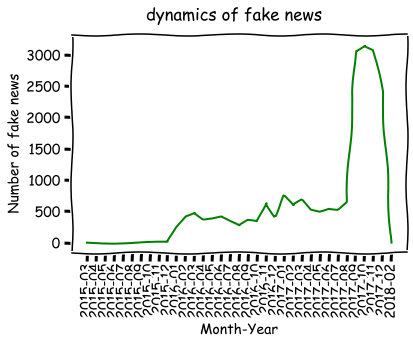

In [16]:
import matplotlib.pyplot as plt
plt.xkcd()
plt.suptitle('dynamics of fake news')
plt.xticks(rotation = 90)
plt.ylabel('Number of fake news')
plt.xlabel('Month-Year')
plt.plot(sub.index, sub.values, linewidth = 2, color = 'g')

#### 2017 was the year, fake news hits all time high, interesting!!

In [17]:
sub2 = df[['subject', 'flag']]
sub2 = sub2.dropna()
sub2 = sub2.groupby(['subject'])['flag'].sum()

<BarContainer object of 8 artists>

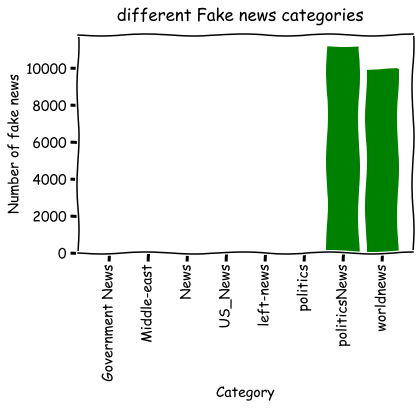

In [18]:
plt.xkcd()
plt.suptitle('different Fake news categories')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Category')

plt.bar(sub2.index, height=sub2.values, color='green')
#ax1.plot(x, y)
#ax2.plot(x, -y)

* subject 
* date 
are two crucial features to decide whether the news is fake or not. should be included into the model

# Text Preparation

In [19]:
nlp = df

### word cloud visualisation

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = nlp[nlp['flag'] == 1]['title'].iloc[0:500] # We will take a slice of fake news, to see what vocabulary there looks like
tfidf1 = TfidfVectorizer()
vecs = tfidf1.fit_transform(corpus)

feature_names = tfidf1.get_feature_names()
dense = vecs.todense()
list_words = dense.tolist()
df_words = pd.DataFrame(list_words, columns=feature_names)

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df_words.T.sum(axis=1)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_words.T.sum(axis=1))

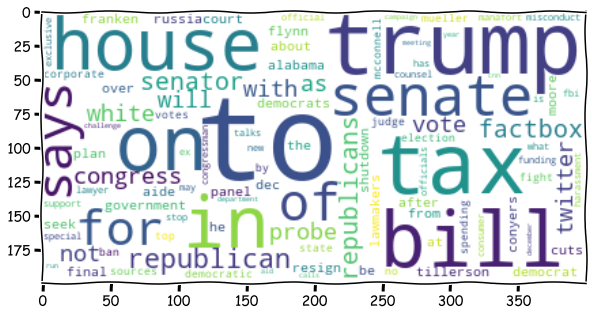

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.imshow(Cloud, interpolation='bilinear')

#### wow, above is all the fake news!!

### Tfidf-Vectorizing